In [1]:
#Import required packages in the session
import pandas as pd
import statsmodels.formula.api as smf

In [82]:
#read insurance losses csv file in pandas
insloss=pd.read_csv("insurance_losses.csv")

In [3]:
type(insloss)

pandas.core.frame.DataFrame

In [4]:
insloss.head()

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses
0,150023,24,5,1,M,Married,11,P,203
1,152720,31,10,1,F,Single,6,P,402
2,174207,56,37,1,M,Married,0,D,553
3,139895,52,31,1,F,Married,15,P,292
4,174407,20,3,1,M,Single,15,P,247


In [5]:
insloss.tail()

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses
15285,189499,61,43,4,F,Single,11,P,58
15286,142111,69,48,4,F,Married,9,P,305
15287,175986,69,51,4,F,Married,13,P,282
15288,199800,22,4,4,M,Married,9,D,822
15289,187711,20,2,4,F,Married,2,P,407


In [7]:
type(insloss)

pandas.core.frame.DataFrame

In [8]:
insloss.shape # No of rows and columns

(15290, 9)

In [9]:
insloss.columns # What all columns are there

Index(['Policy_Number', 'Age', 'Years_of_Driving_Experience',
       'Number_of_Vehicles', 'Gender', 'Married', 'Vehicle_Age', 'Fuel_Type',
       'Losses'],
      dtype='object')

In [10]:
##concept of singular and plural dtype and dtypes
insloss.dtypes

Policy_Number                   int64
Age                             int64
Years_of_Driving_Experience     int64
Number_of_Vehicles              int64
Gender                         object
Married                        object
Vehicle_Age                     int64
Fuel_Type                      object
Losses                          int64
dtype: object

In [11]:
insloss.Policy_Number.dtype

dtype('int64')

<Axes: ylabel='Losses'>

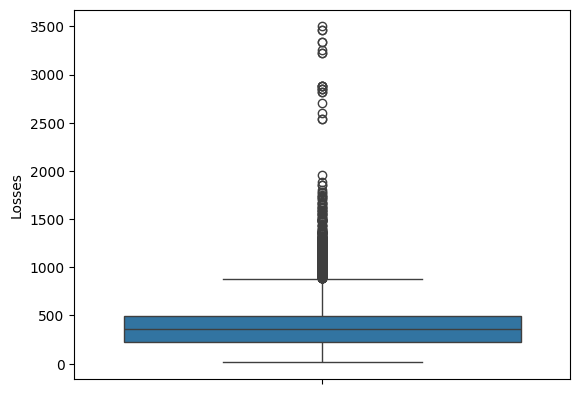

In [6]:
# prompt: draw a box whisker plot of losses using the dataframe insloss created earlier

import seaborn as sns
sns.boxplot(data=insloss, y='Losses')


In [12]:
##

insloss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Policy_Number                15290 non-null  int64 
 1   Age                          15290 non-null  int64 
 2   Years_of_Driving_Experience  15290 non-null  int64 
 3   Number_of_Vehicles           15290 non-null  int64 
 4   Gender                       15290 non-null  object
 5   Married                      15290 non-null  object
 6   Vehicle_Age                  15290 non-null  int64 
 7   Fuel_Type                    15290 non-null  object
 8   Losses                       15290 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.1+ MB


In [13]:
##Data Types of the Variables
#Policy_Number is just an ID field and is useless for any analytics

#Contiuous
#Age
#Years_of_Driving_Experience
#Number_of_Vehicles
#Vehicle_Age
#Losses (Target Variable)

#Categorical
#Gender
#Married
#Fuel_Type



In [14]:
insloss.describe()

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Vehicle_Age,Losses
count,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000
mean,149910.276651,42.328254,23.732897,2.495880,8.655723,389.858012
std,28948.806631,18.280511,17.850707,0.953776,4.344536,253.729469
min,100002.000000,16.000000,0.000000,1.000000,0.000000,13.000000
25%,124842.000000,24.000000,6.000000,2.000000,6.000000,226.000000
50%,149872.000000,42.000000,23.000000,2.000000,9.000000,355.000000
75%,175011.000000,61.000000,42.000000,3.000000,12.000000,489.000000
max,200000.000000,70.000000,53.000000,4.000000,15.000000,3500.000000


In [15]:
#Concept of plotting inline (implicit) and plotting explicitly by calling plt.show()

import matplotlib.pyplot as plt

## If we dont do below then we will need to call plt.show() explicitly to plot the graph
%matplotlib inline

<Axes: xlabel='Fuel_Type'>

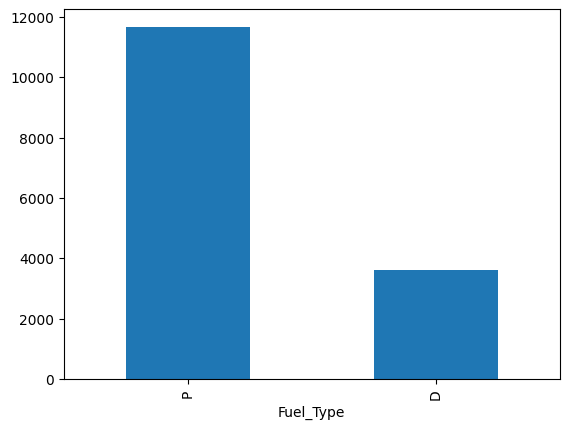

In [16]:
#This requires matplotlib

insloss['Fuel_Type'].value_counts().plot(kind="bar")

In [17]:
insloss['Fuel_Type'].value_counts()

Fuel_Type
P    11670
D     3620
Name: count, dtype: int64

In [18]:
insloss['Losses'].mean()

389.8580117724003

In [19]:
insloss['Losses'].median()

355.0

In [20]:

insloss['Fuel_Type'].mode()

0    P
Name: Fuel_Type, dtype: object

In [21]:
##Continuous and Categorical Variables

## For continuous variables -- see different quantiles and try to see outliers both graphically and quantile wise

#insloss.Losses.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99])

##Check for adding column labels
print(insloss.Losses.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1]))


0.10     122.0
0.20     195.0
0.30     260.0
0.40     314.0
0.50     355.0
0.60     399.0
0.70     454.0
0.80     538.0
0.90     685.0
0.95     821.0
0.99    1204.0
1.00    3500.0
Name: Losses, dtype: float64


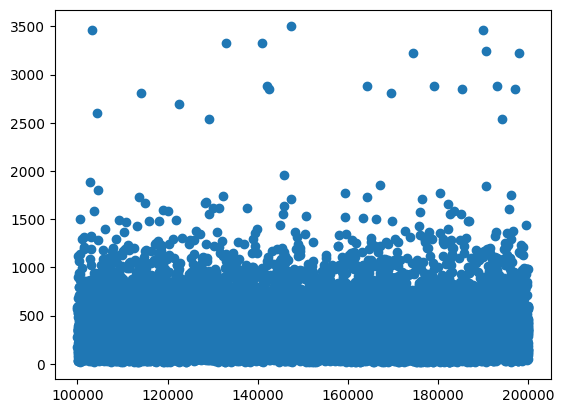

In [22]:
#Try to see the same using scatterplot
##POlicy Number Vs Losses

plt.scatter(insloss.Policy_Number,insloss.Losses)

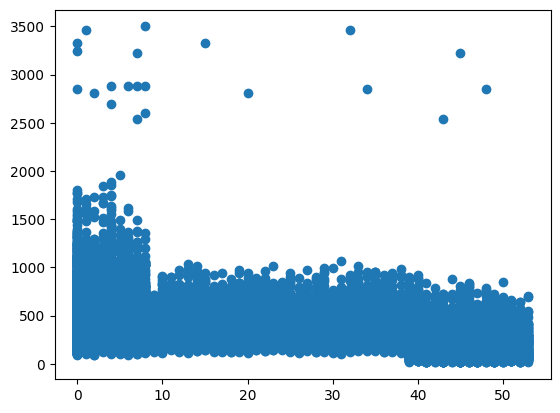

In [23]:
#Years Of driving experience Vs Losses
plt.scatter(insloss.Years_of_Driving_Experience,insloss.Losses)

array([[<Axes: title={'center': 'Vehicle_Age'}>]], dtype=object)

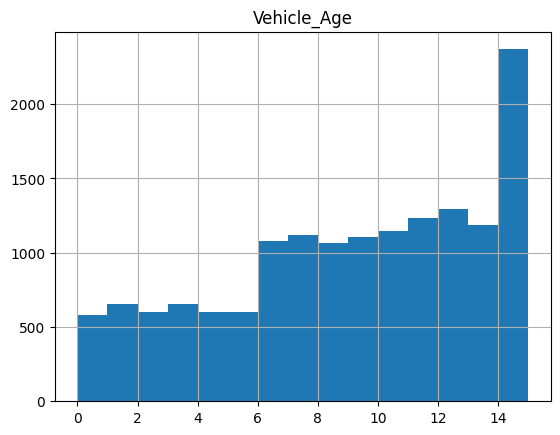

In [24]:
#For categorical variables try box Plot
#Number_of_Vehicles
#Gender
#Married
#Fuel_Type

#by default no of bins =10 and we can change that
insloss.hist(column='Vehicle_Age',bins=15)


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

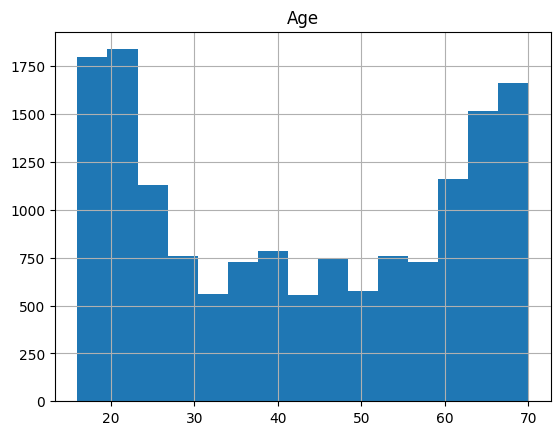

In [25]:
insloss.hist(column='Age',bins=15)

<Axes: xlabel='Gender'>

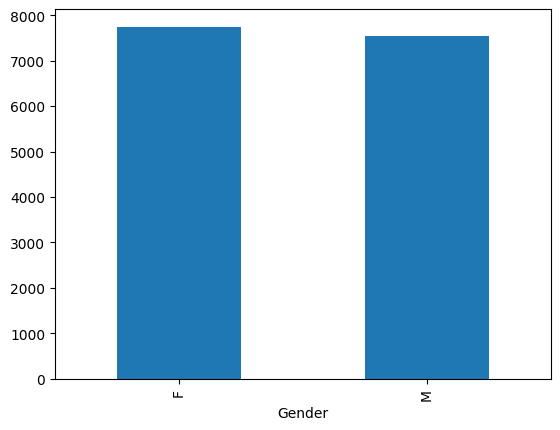

In [26]:
##insloss.hist(column='Age')
insloss['Gender'].value_counts().plot(kind="bar")

In [27]:
#Build a first cut of the model with target as Loss variable

#Train - Test split

from sklearn.model_selection import train_test_split

train, test = train_test_split(insloss, test_size=0.2)


In [28]:
print(train.info())


<class 'pandas.core.frame.DataFrame'>
Index: 12232 entries, 12053 to 2140
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Policy_Number                12232 non-null  int64 
 1   Age                          12232 non-null  int64 
 2   Years_of_Driving_Experience  12232 non-null  int64 
 3   Number_of_Vehicles           12232 non-null  int64 
 4   Gender                       12232 non-null  object
 5   Married                      12232 non-null  object
 6   Vehicle_Age                  12232 non-null  int64 
 7   Fuel_Type                    12232 non-null  object
 8   Losses                       12232 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 955.6+ KB
None


In [29]:

#Build model on train and then predict on test and see the accuracy

model_losses= smf.ols(formula='Losses ~ Age+Number_of_Vehicles+Gender+Married+Vehicle_Age+Fuel_Type', data=train).fit()

In [30]:
model_losses.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Losses   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     3577.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:51:32   Log-Likelihood:                -78769.
No. Observations:               12232   AIC:                         1.576e+05
Df Residuals:                   12225   BIC:                         1.576e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            859.9127      6.389    134.591      0.000     847.389     872.436
Gender[T.M]           52.2983      2.800     18.681      0.000      46.811      57.786
Married[T.Single]     78.9546      2.839     27.806      0.000      73.389      84.520
Fuel_Type[T.P]      -298.7601      3.946    -75.718      0.000    -306.494    -291.026
Age                   -4.5879      0.087    -53.011      0.000      -4.758      -4.418
Number_of_Vehicles    -1.6005      1.434     -1.116      0.264      -4.411       1.209
Vehicle_Age          -12.5278      0.360    -34.764      0.000     -13.234     -11.821
==============================================================================
Omnibus:                    13691.101   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3305655.962
Skew:                           5.402   Prob(JB):                         0.00
Kurtosis:                      82.807   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:

print(model_losses.rsquared_adj)

#Now predict on test
pred_losses_test = model_losses.predict(test)
err_losses=(test['Losses'] - pred_losses_test) **2
err_losses.head()
meanerr_losses=sum(err_losses)
print(meanerr_losses)

mse_losses= (meanerr_losses/err_losses.count())
#Mean Square Error
print(mse_losses)


0.6369484276544664
83395540.98902369
27271.26912656105


In [32]:

#Build model on train and then predict on test and see the accuracy

model_losses2= smf.ols(formula='Losses ~ Age+Gender+Married+Vehicle_Age+Fuel_Type', data=train).fit()

In [33]:

print(model_losses2.rsquared_adj)

#Now predict on test
pred_losses_test2 = model_losses2.predict(test)
err_losses2=(test['Losses'] - pred_losses_test2) **2
err_losses2.head()
meanerr_losses2=sum(err_losses2)
print(meanerr_losses2)

mse_losses2= (meanerr_losses2/err_losses2.count())
#Mean Square Error
print(mse_losses2)


0.636941107293943
83416582.07347599
27278.149795119683


In [84]:
#Now that we are aware that we have outlier values in Losses so we will build a capping function which
#will cap all outliers to $1200 approx 99 percentile value

def caplossfunc(loss):
    if loss>1200:
        inslosscap=1200
    else:
        inslosscap=loss
    return inslosscap

In [85]:
#Apply the function on Losses column and create a new column called inslosscap1
insloss['inslosscap1']=insloss['Losses'].map(caplossfunc)

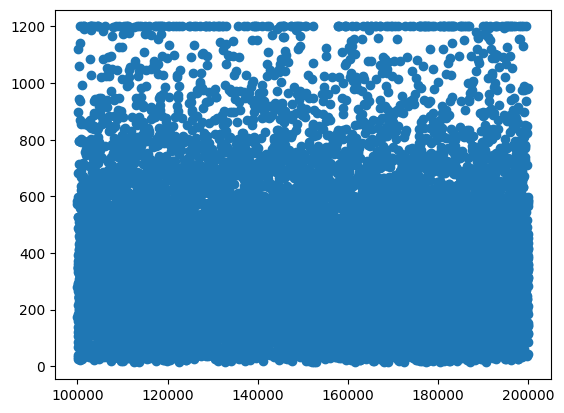

In [86]:
plt.scatter(insloss.Policy_Number,insloss.inslosscap1)

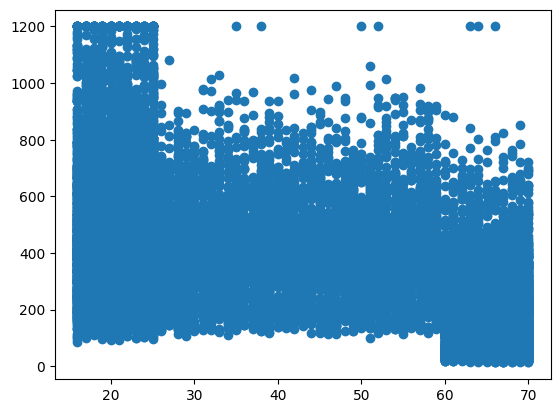

In [37]:
#Age Scatterplot Vs Losses
plt.scatter(insloss.Age,insloss.inslosscap1)

In [38]:
insloss.head()

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses,inslosscap1
0,150023,24,5,1,M,Married,11,P,203,203
1,152720,31,10,1,F,Single,6,P,402,402
2,174207,56,37,1,M,Married,0,D,553,553
3,139895,52,31,1,F,Married,15,P,292,292
4,174407,20,3,1,M,Single,15,P,247,247


In [39]:
#You can use pandasql to write sql queries on dataframes

In [40]:
#If you dont have pandassql installed you can do a pip install
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=66a05f2cd409754ada70b31666f16ef391bdf648bbd641339b2e00ebf6f9fba0
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [41]:
import pandasql as ps

In [42]:
#now run sql like queries against pandas dataframes

rcount= ps.sqldf('''select count(*) as CNT from insloss''')

In [43]:
rcount

,CNT
0,15290


In [44]:
#There are more pythonic ways of doing this as well but if you are not well versed in Python
#especially pandas the learning curve might be steeper
lossgt1200=ps.sqldf('''select * from insloss where Losses >1200''')

In [45]:
lossgt1200.head()

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses,inslosscap1
0,147315,25,8,1,M,Single,5,D,3500,1200
1,190621,16,0,1,M,Single,15,P,3250,1200
2,142474,66,48,1,M,Single,10,P,2850,1200
3,194236,63,43,1,F,Single,10,P,2535,1200
4,185366,52,34,1,M,Married,5,D,2852,1200


In [46]:
lossgt1200_inslosscap1=ps.sqldf('''select * from insloss where insLosscap1 >1200''')

In [47]:
lossgt1200_inslosscap1

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses,inslosscap1


In [48]:
#Notice that for Losses >1200 the values have been capped at 1200
lossgt1200.head()

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses,inslosscap1
0,147315,25,8,1,M,Single,5,D,3500,1200
1,190621,16,0,1,M,Single,15,P,3250,1200
2,142474,66,48,1,M,Single,10,P,2850,1200
3,194236,63,43,1,F,Single,10,P,2535,1200
4,185366,52,34,1,M,Married,5,D,2852,1200


In [49]:
ps.sqldf('''select * from insloss where Losses >1200''').head()

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses,inslosscap1
0,147315,25,8,1,M,Single,5,D,3500,1200
1,190621,16,0,1,M,Single,15,P,3250,1200
2,142474,66,48,1,M,Single,10,P,2850,1200
3,194236,63,43,1,F,Single,10,P,2535,1200
4,185366,52,34,1,M,Married,5,D,2852,1200


In [50]:
#Pythonic way ..

insloss.loc[insloss['Losses']> 1200].head()

#Both return the same result but it totally depends on you comfort level in pandas and eventually you would
#like to get there

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses,inslosscap1
101,147315,25,8,1,M,Single,5,D,3500,1200
102,190621,16,0,1,M,Single,15,P,3250,1200
103,142474,66,48,1,M,Single,10,P,2850,1200
104,194236,63,43,1,F,Single,10,P,2535,1200
105,185366,52,34,1,M,Married,5,D,2852,1200


array([[<Axes: title={'center': 'Losses'}>]], dtype=object)

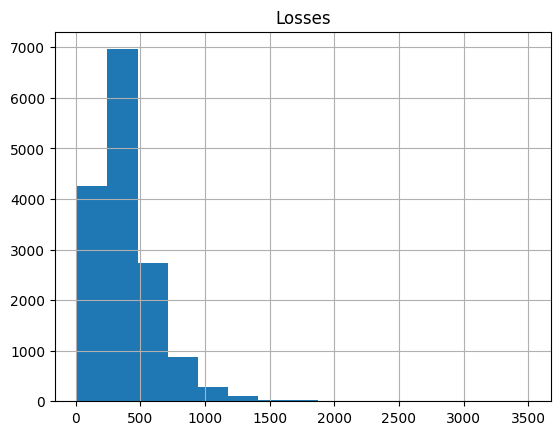

In [51]:
insloss.hist(column='Losses',bins=15)

array([[<Axes: title={'center': 'inslosscap1'}>]], dtype=object)

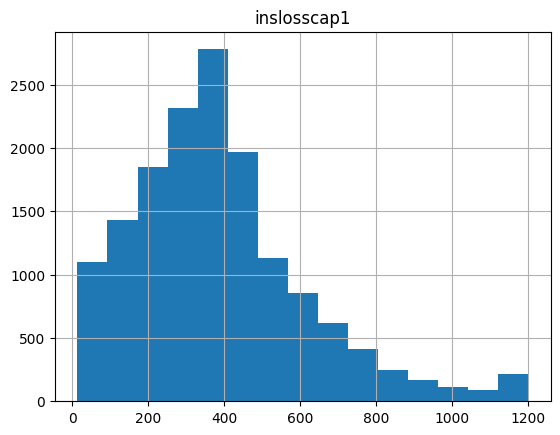

In [52]:
insloss.hist(column='inslosscap1',bins=15)

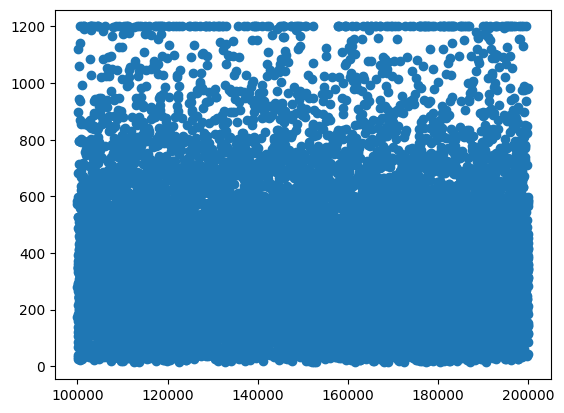

In [53]:
plt.scatter(insloss.Policy_Number,insloss.inslosscap1)

#This looks more of a distribution with no outliers

In [88]:
# Select only numerical columns
numerical_df = insloss.select_dtypes(include='number')

# Calculate Pearson correlation
correlation_matrix = numerical_df.corr(method='pearson')
correlation_matrix

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Vehicle_Age,Losses,inslosscap1
Policy_Number,1.000000,0.000659,0.001328,0.013103,-0.001303,0.004574,0.002118
Age,0.000659,1.000000,0.997161,0.008366,-0.243571,-0.442951,-0.475753
Years_of_Driving_Experience,0.001328,0.997161,1.000000,0.008545,-0.238172,-0.442103,-0.475259
Number_of_Vehicles,0.013103,0.008366,0.008545,1.000000,0.005924,-0.011548,-0.003211
Vehicle_Age,-0.001303,-0.243571,-0.238172,0.005924,1.000000,-0.274736,-0.289448
Losses,0.004574,-0.442951,-0.442103,-0.011548,-0.274736,1.000000,0.960857
inslosscap1,0.002118,-0.475753,-0.475259,-0.003211,-0.289448,0.960857,1.000000


In [89]:
## Do  correlation analysis to see which independent variables are highly correlated
## Since we would like to keep only one of those variables , since higher the number of variables
##in the model worse will be its performance in generalizing or performing on test data

#Plot the correlation matrix

#insloss.corr(method='pearson')

In [90]:
#We see  a strong correlation between Age and Years_of_Driving_Experience
#So which to keep and which to drop

import statsmodels.formula.api as smf

In [91]:
model1 = smf.ols(formula='inslosscap1 ~ Age', data=insloss)

In [92]:
res = model1.fit()

In [93]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            inslosscap1   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     4473.
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:13:12   Log-Likelihood:            -1.0280e+05
No. Observations:               15290   AIC:                         2.056e+05
Df Residuals:                   15288   BIC:                         2.056e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    637.6578      4.105    155.346      0.0

### Quick note on Condition Number
<b><u>Condition number</u></b>
<li>One way to assess multicollinearity is to compute the condition number. Very high values (like maybe over 1000 are worrisome and need the user to look back at the data if there are any correlated variables)
<li>In the field of numerical analysis, the condition number of a function with respect to an argument measures how much the output value of the function can change for a small change in the input argument. This is used to measure how sensitive a function is to changes or errors in the input, and how much error in the output results from an error in the input.

In [94]:
print('Parameters: ', res.params)
print('R2: ', res.rsquared_adj)

Parameters:  Intercept    637.657762
Age           -5.953929
dtype: float64
R2:  0.2262899920016097


In [95]:

model2 = smf.ols(formula='inslosscap1 ~ Years_of_Driving_Experience', data=insloss)

In [96]:
res2=model2.fit()

In [97]:
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:            inslosscap1   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     4461.
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:13:22   Log-Likelihood:            -1.0280e+05
No. Observations:               15290   AIC:                         2.056e+05
Df Residuals:                   15288   BIC:                         2.056e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [98]:
print('Parameters: ', res2.params)
print('R2: ', res2.rsquared_adj)

Parameters:  Intercept                      530.194526
Years_of_Driving_Experience     -6.090963
dtype: float64
R2:  0.22582072899414352



<b>Quick note on R-Squared and Adjusted R-Squared </b>

<li> Every predictor added to a model increases R-squared and never decreases it.
<li>Thus, a model with more terms may seem to have a better fit just for the
fact that it has more terms

<li> While the adjusted R-squared compensates for the addition of variables and only increases
if the new term enhances the model above what would be obtained by probability and
decreases when a predictor enhances the model less than what is predicted by chance.

<li>In an overfitting condition, an incorrectly high value of R-squared, which leads to a
decreased ability to predict, is obtained. This is not the case with the adjusted R-squared.

<li>So always look for Adjusted R-square

### Hypothesis Testing

<u><b>F-value interpration</b></u>

<p>Whether you compare the F-value to the critical value or the p-value to the significance level,
the results are the same. It’s a different way of doing the same thing.

An F-value that equals the critical value is equivalent to the p-value equaling the significance level.

The F-test for overall significance has the following two hypotheses:

<li>The null hypothesis states that the model with no independent variables fits the data as well as your model
<li>The alternative hypothesis says that your model fits the data better than the intercept-only model

<u><b>t-value interpretation</b></u>

<li>Tests for each predictor and gives a p-value to tell us whether that predictor is statistically significant or not

<li> Null Hypothesis : The coefficient for each predictor is equal to 0 i.e is statistically insignificant
    
<li> So now you would appreciate why the pdf should be a Normal Distribution
since if it not - then applying the critical or p-value concept would be flawed since you are looking at Normal Distribution whereas your actual pdf is non-normal
    

In [81]:
insloss.head(5)

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses,inslosscap1
0,150023,24,5,1,NaN,NaN,11,NaN,203,203
1,152720,31,10,1,NaN,NaN,6,NaN,402,402
2,174207,56,37,1,NaN,NaN,0,NaN,553,553
3,139895,52,31,1,NaN,NaN,15,NaN,292,292
4,174407,20,3,1,NaN,NaN,15,NaN,247,247


In [100]:
# So from above 2 models we see Age fits the model better and hence we can drop Years_of_Driving_Experience

#Try a first cut of the model

fitlinreg= smf.ols(formula='inslosscap1 ~ Age+ Number_of_Vehicles+ Gender + Married + Vehicle_Age+ Fuel_Type', data=insloss).fit()

In [101]:
print(fitlinreg.summary())

                            OLS Regression Results                            
Dep. Variable:            inslosscap1   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     6637.
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:14:01   Log-Likelihood:                -94957.
No. Observations:               15290   AIC:                         1.899e+05
Df Residuals:                   15283   BIC:                         1.900e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            835.0163      4

In [102]:
print(fitlinreg.rsquared_adj)

0.7225510958109296


In [103]:
#Now lets try to tune the model
#Can we do something about the Age, Vehicle Age since there distribution looks like there are some specific cluster
#in the data


distinct_age=ps.sqldf("select distinct(age) from insloss")

print(distinct_age.head())


   Age
0   24
1   31
2   56
3   52
4   20


In [104]:
sumdf1=ps.sqldf("select b.Age,sum(Losses) as Sum_Losses,sum(inslosscap1) as \
                    Sum_Capped_losses, \
                    count(*) as Sum_Count from insloss a join distinct_age b on \
                    a.age=b.age group by \
                b.age")

print(sumdf1.head())

   Age  Sum_Losses  Sum_Capped_losses  Sum_Count
0   16      247717             242293        477
1   17      237152             232016        429
2   18      230959             226114        445
3   19      225259             221637        445
4   20      230889             225761        432


In [105]:
Ageband=ps.sqldf("select Age, (sum_losses/sum_count) as avg_loss, \
                    (sum_capped_losses/sum_count) as Avg_capped_loss from sumdf1")
print(Ageband.head())

   Age  avg_loss  Avg_capped_loss
0   16       519              507
1   17       552              540
2   18       519              508
3   19       506              498
4   20       534              522


<Axes: xlabel='Age'>

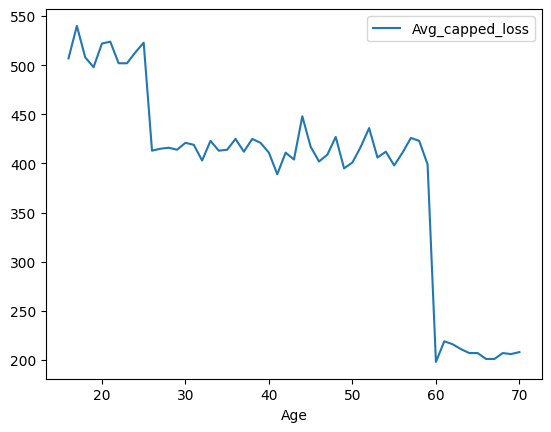

In [106]:
Ageband.plot.line(x='Age',y='Avg_capped_loss')

In [107]:
import math

In [108]:
#Now from the graph it is clear there must be 3 age bands -
#16-25
#>25-59
#60+

#So lets create 3 age bands in our dataframe insloss

insloss['agebandcat'] = pd.cut(insloss['Age'], [15,25,59,math.inf], labels=['16-25', '26-59', '60+'])

In [109]:
insloss.head(10)

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses,inslosscap1,agebandcat
0,150023,24,5,1,M,Married,11,P,203,203,16-25
1,152720,31,10,1,F,Single,6,P,402,402,26-59
2,174207,56,37,1,M,Married,0,D,553,553,26-59
3,139895,52,31,1,F,Married,15,P,292,292,26-59
4,174407,20,3,1,M,Single,15,P,247,247,16-25
5,170545,29,8,1,M,Married,9,P,385,385,26-59
6,123164,36,19,1,F,Single,0,P,462,462,26-59
7,147118,67,49,1,F,Married,15,P,169,169,60+
8,119842,69,48,1,M,Single,5,P,70,70,60+
9,192628,16,0,1,F,Single,14,P,243,243,16-25


In [110]:
#Do a Similar Exercise with vehicle age band category

insloss['vehagebandcat']=pd.cut(insloss['Vehicle_Age'],[-1,5,10,math.inf], labels=['0-5', '6-10', '10+'])

In [111]:
insloss.head()

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses,inslosscap1,agebandcat,vehagebandcat
0,150023,24,5,1,M,Married,11,P,203,203,16-25,10+
1,152720,31,10,1,F,Single,6,P,402,402,26-59,6-10
2,174207,56,37,1,M,Married,0,D,553,553,26-59,0-5
3,139895,52,31,1,F,Married,15,P,292,292,26-59,10+
4,174407,20,3,1,M,Single,15,P,247,247,16-25,10+


In [112]:
#Now try and fit linear model using these categorical variables

model3=smf.ols(formula='inslosscap1 ~ agebandcat+Number_of_Vehicles+Gender+Married+ \
                 +Vehicle_Age+Fuel_Type', data=insloss).fit()

In [113]:
print(model3.rsquared_adj)

0.7481752752156674


In [114]:
#Now try and fit linear model using these categorical variables

model4=smf.ols(formula='inslosscap1 ~ agebandcat+Number_of_Vehicles+Gender+Married+ \
                 +vehagebandcat+Fuel_Type', data=insloss).fit()

In [115]:
print(model4.rsquared_adj)

0.7575424145761879


In [116]:
#Now is there any step that we have missed before we would have even started on this exercise

#Train - Test split

from sklearn.model_selection import train_test_split

train, test = train_test_split(insloss, test_size=0.2)

In [117]:
train.shape

(12232, 12)

In [118]:
test.shape

(3058, 12)

In [119]:
pwd()

'/content'

In [120]:
#Build model on train and then predict on test and see the accuracy

model5= smf.ols(formula='inslosscap1 ~ agebandcat+Number_of_Vehicles+Gender+Married+ \
                 +vehagebandcat+Fuel_Type', data=train).fit()

In [121]:
print(model5.rsquared_adj)

0.7562661114451303


In [122]:
#Now predict on test
pred_test = model5.predict(test)

In [123]:
pred_test.head(10)

8902     196.015749
4518     423.111339
8829     196.015749
13141    554.698480
12093     53.824222
6042     198.714369
13149    302.686727
14638    352.205919
5364     369.231826
1214     651.182895
dtype: float64

In [124]:
err=(test['inslosscap1'] - pred_test) **2
err.head()

8902      1157.071164
4518      2903.987747
8829     16904.094928
13141      161.251399
12093     1012.781132
dtype: float64

In [125]:

meanerr=sum(err)
print(meanerr)

37732687.90054013


In [126]:
mse= (meanerr/err.count())
print(mse)

12339.008469764594


In [127]:
model6= smf.ols(formula='inslosscap1 ~ Age+Number_of_Vehicles+Gender+Married+ \
                 +Vehicle_Age+Fuel_Type', data=train).fit()

In [128]:
print(model6.rsquared_adj)

0.7216794917969307


In [129]:
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:            inslosscap1   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     5287.
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:14:51   Log-Likelihood:                -75995.
No. Observations:               12232   AIC:                         1.520e+05
Df Residuals:                   12225   BIC:                         1.521e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            834.3967      5

In [130]:
#Now predict on test
pred_test6 = model6.predict(test)

In [131]:
err=(test['inslosscap1'] - pred_test6) **2
meanerr=sum(err)
mse6= (meanerr/err.count())
print(mse6)

14243.196468377993


In [132]:
## So which model is better ?